In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
final_bycountry=pd.read_csv("databycountry.csv")

In [3]:
#check columns in the dataset
final_bycountry.dtypes

index        int64
Date        object
country     object
misogyny     int64
total        int64
dtype: object

In [4]:
#convert Date column to date format
final_bycountry["Date"] = pd.to_datetime(final_bycountry["Date"], format='%d/%m/%Y')
final_bycountry["Date"]=final_bycountry['Date'].dt.date

In [5]:
#get total number of tweets for each date - aggregate all country data
final_merged=final_bycountry.groupby(['Date']).agg(misogyny=('misogyny', 'sum'), total=('total', 'sum'),)

In [6]:
final_merged.reset_index(inplace=True)

In [7]:
#estimate percentage of misogynystic tweets
final_merged["percent"]=(final_merged["misogyny"]/final_merged["total"])*100

In [8]:
final_merged=final_merged.sort_values(by='Date')

In [9]:
#date of COVID-19 onset
covid=datetime.date(2020, 4, 1)

In [10]:
# Column for days since COVID-19
final_merged['Timesince'] = final_merged.apply(lambda x: (x.Date - covid).days, axis=1)

In [11]:
plt.rcParams["figure.figsize"] = [10, 8]

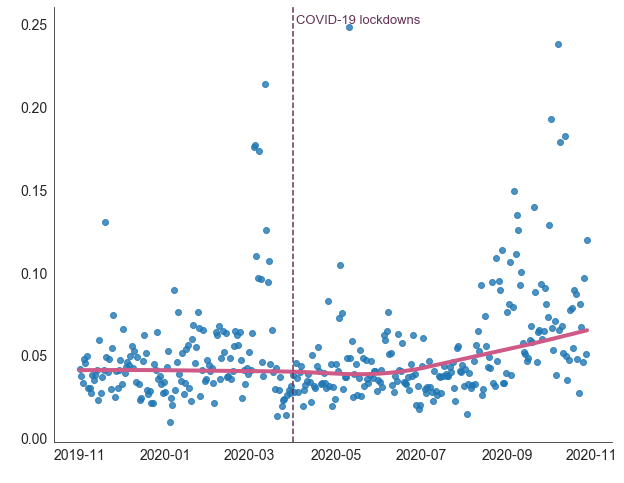

In [12]:
#plot daily percentage of misogynystic tweets and plot the regression line
sns.set_style(style='white')
sns.regplot(
    x='Timesince',
    y='percent',
    data= final_merged, lowess=True, line_kws={'lw': 4, 'color': '#cd5a87'})

ax = plt.gca()
ax.axvline(0, color='#623357', linestyle='--', lw=1.5)
plt.text(2,0.25, 'COVID-19 lockdowns', size=13, color='#623357')

positions = (-152, -91, -31, 31, 92, 153, 213)
labels = ("2019-11", "2020-01", "2020-03","2020-05", "2020-07", "2020-09", "2020-11")
plt.xticks(positions, labels)
plt.xticks(horizontalalignment="center", fontname="Arial", fontsize=14)
plt.yticks(horizontalalignment="right", fontname="Arial", fontsize=14)
plt.xlabel(" ")
plt.ylabel(" ")
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.show()
#to save the figure in the system:
plt.savefig("D:/misogyny.png")

In [13]:
#draw plots of daily number of misogynystic tweets for each country
PK=final_bycountry[final_bycountry["country"]=="PK"]
IN=final_bycountry[final_bycountry["country"]=="IN"]
NP=final_bycountry[final_bycountry["country"]=="NP"]
LK=final_bycountry[final_bycountry["country"]=="LK"]
BD=final_bycountry[final_bycountry["country"]=="BD"]

In [14]:
plt.rcParams["figure.figsize"] = [20, 5]

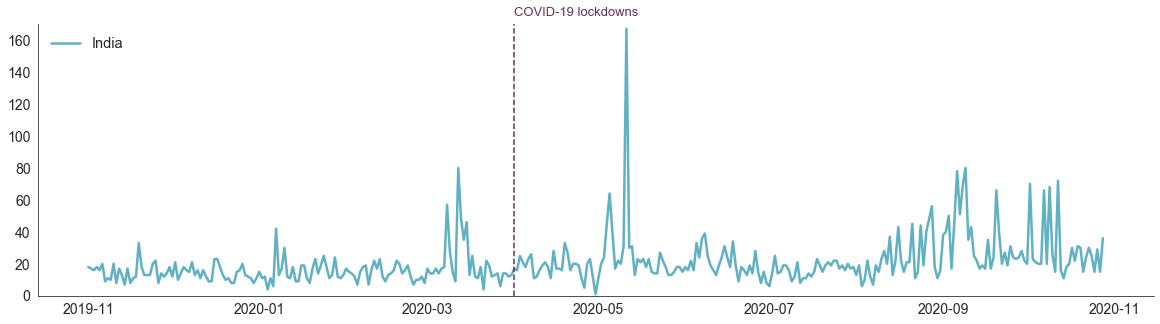

In [17]:
plt.plot(IN['Date'], IN['misogyny'].values, color="#60b1c4", linewidth=2.5, label="India")
plt.xticks(horizontalalignment="center", fontname="Arial", fontsize=14)
plt.yticks(horizontalalignment="right", fontname="Arial", fontsize=14)
ax = plt.gca()
ax.legend(frameon=False, loc='upper left', prop={'family': 'Arial', 'size':14.5})
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.axvline(covid, color='#623357', linestyle='--', lw=1.5)

plt.text(covid,175, 'COVID-19 lockdowns', size=13, color='#623357')
plt.ylim(0,170)
plt.show()
#to save the figure in the system:
plt.savefig("D:/India.png")

(0, 60)

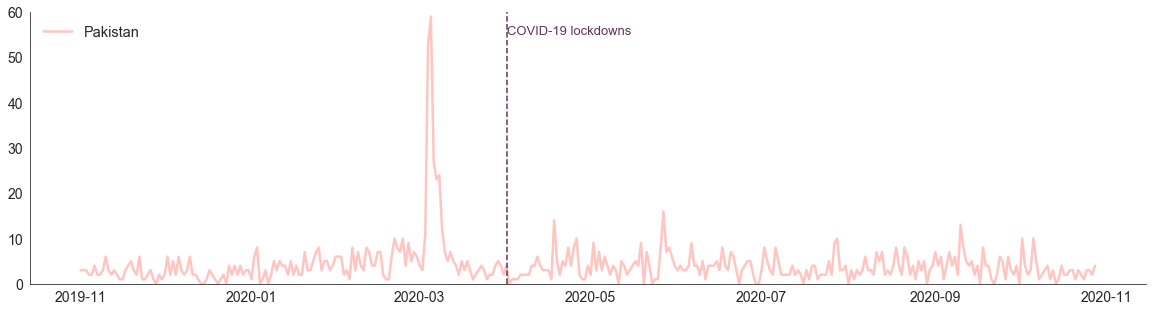

In [18]:
plt.plot(PK['Date'], PK['misogyny'].values, color="#ffc5c0", linewidth=2.5, label="Pakistan")
plt.xticks(horizontalalignment="center", fontname="Arial", fontsize=14)
plt.yticks(horizontalalignment="right", fontname="Arial", fontsize=14)
ax = plt.gca()
ax.legend(frameon=False, loc='upper left', prop={'family': 'Arial', 'size':14.5})
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.axvline(covid, color='#623357', linestyle='--', lw=1.5)

plt.text(covid,55, 'COVID-19 lockdowns', size=13, color='#623357')
plt.ylim(0,60)
#to save the figure in the system:
plt.savefig("D:/Pakistan.png")

Text(2020-04-01, 6, 'COVID-19 lockdowns')

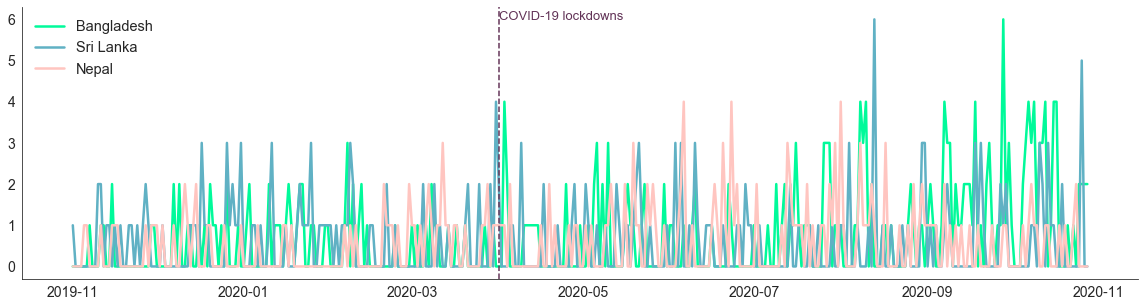

In [19]:
plt.plot(BD['Date'], BD['misogyny'].values, color="mediumspringgreen", linewidth=2.5, label="Bangladesh")
plt.plot(LK['Date'], LK['misogyny'].values, color="#60b1c4", linewidth=2.5, label="Sri Lanka")
plt.plot(NP['Date'], NP['misogyny'].values, color="#ffc5c0", linewidth=2.5, label="Nepal")
plt.xticks(horizontalalignment="center", fontname="Arial", fontsize=14)
plt.yticks(horizontalalignment="right", fontname="Arial", fontsize=14)
ax = plt.gca()
ax.legend(frameon=False, loc='upper left', prop={'family': 'Arial', 'size':14.5})
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.axvline(covid, color='#623357', linestyle='--', lw=1.5)

plt.text(covid,6, 'COVID-19 lockdowns', size=13, color='#623357')
#to save the figure in the system:
plt.savefig("D:/NepalSriLankaBangladesh.png")